In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [ ]:
model = YOLO('yolov8m-obb.pt')

In [ ]:
!nvidia-smi

Tue Apr  2 09:17:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# path = 'dataset/train/images/'
# path_to_labels = 'dataset/train/labels/'
# images_list = os.listdir(path)
# labels_list = os.listdir(path_to_labels)
# image_example_indices = np.random.choice(np.arange(len(images_list)), 4)
# labels_example_files = [labels_list[i] for i in image_example_indices]

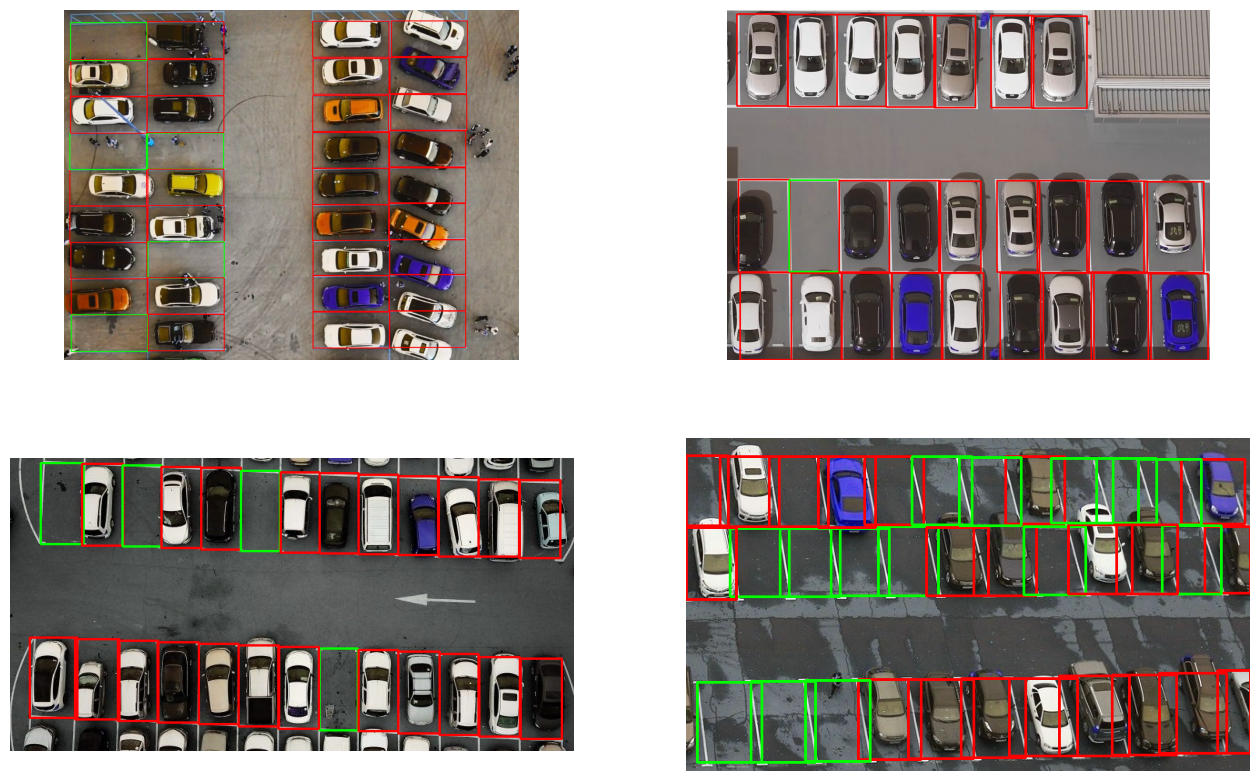

In [ ]:
# plt.figure(figsize=(16, 10))
# for i, index in enumerate(image_example_indices):
#     plt.subplot(2, 2, i+1)

#     image_path = os.path.join(path, images_list[index])
#     image = cv2.imread(image_path)
#     colors = [(0, 255, 0), (255, 0, 0)]

#     with open(os.path.join(path_to_labels, labels_example_files[i]), 'r') as file:
#         boxes = list(map(lambda x: x.strip('\n'), file.readlines()))
#         for box in boxes:
#             box = list(map(float, box.split()))
#             label, x, y, w, h = box[0], box[1], box[2], box[3], box[4]
#             x_min, y_min = int((x - w/2) * image.shape[1]), int((y - h/2) * image.shape[0])
#             x_max, y_max = int((x + w/2) * image.shape[1]), int((y + h/2) * image.shape[0])
#             cv2.rectangle(image, (x_min, y_min), (x_max, y_max), colors[int(label)], 2)

#     plt.imshow(image)
#     plt.axis('off')

# plt.show()

In [ ]:
results = model.train(data='dataset/data.yaml', batch=8, epochs=150, imgsz=640)

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8m-obb.pt, data=dataset/data.yaml, epochs=150, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /content/drive/MyDrive/Colab Notebooks/Tracking cars in the parking lot/dataset/train/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Colab Notebooks/Tracking cars in the parking lot/dataset/validation/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]


Plotting labels to runs/obb/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 83 weight(decay=0.0), 93 weight(decay=0.0005), 92 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train4
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.91G      1.866      3.571      2.482        626        640:  75%|███████▌  | 3/4 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         11        295     0.0475      0.389     0.0479     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      5.14G      1.611      3.274      2.525        116        640: 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         11        295     0.0755      0.703      0.199      0.061



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      5.21G      1.289      3.058      2.046        218        640: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         11        295      0.659      0.312      0.231     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150       5.4G      1.222      2.527      1.905        209        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         11        295      0.252      0.574      0.343     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.21G      1.136      1.815      1.821        171        640: 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         11        295      0.469      0.628      0.492      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.15G      1.036      1.374      1.979        116        640: 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         11        295      0.506      0.695      0.535      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.09G     0.9597      1.227      1.803         89        640: 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         11        295      0.631       0.84      0.689      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.03G     0.8491      1.131      1.789        176        640: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         11        295      0.759      0.916      0.874      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.04G     0.8573     0.9908      1.977        123        640: 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         11        295      0.828      0.908      0.912      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      4.82G     0.8799      1.027       1.69        286        640: 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]


                   all         11        295       0.72      0.896       0.83      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      4.71G     0.8376       1.02      2.054        119        640: 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         11        295      0.677      0.887       0.83      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      4.69G     0.8446      1.036      1.815        168        640: 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         11        295      0.853      0.862      0.939      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      4.82G     0.7869     0.9102      1.785        100        640: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         11        295      0.865      0.923      0.955      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      4.71G     0.8614     0.9462      1.967        193        640: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         11        295      0.891       0.93      0.932      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150       4.8G     0.7965     0.8676      1.762        322        640: 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         11        295      0.889      0.936      0.954      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      4.69G     0.7387     0.8085      1.968        242        640: 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         11        295      0.889      0.936      0.954      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      4.89G     0.7138     0.7984      1.797        206        640: 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]


                   all         11        295      0.873      0.936       0.96      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150       4.7G     0.7562     0.7856      1.937        211        640: 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         11        295      0.857       0.95      0.966      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      4.76G     0.7386     0.7496      1.778        312        640: 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]


                   all         11        295      0.857       0.95      0.966      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      4.75G     0.7585     0.7105      1.705        280        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         11        295      0.901      0.941      0.971      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      4.83G     0.7484     0.7219      1.845        182        640: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         11        295      0.943      0.957      0.958      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.64G     0.7421     0.7812      1.902        146        640: 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         11        295      0.943      0.957      0.958      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       4.7G     0.6945     0.7265      1.895        179        640: 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         11        295      0.955      0.956      0.956      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      4.78G     0.7308     0.7352      1.646        252        640: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         11        295      0.955      0.956      0.956      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      4.66G     0.6887     0.7084       1.87        169        640: 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         11        295       0.96      0.952      0.957      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       4.8G     0.7069     0.7296      1.707        165        640: 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         11        295       0.96      0.952      0.957      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      4.71G     0.7151     0.7143       1.81        201        640: 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         11        295      0.957      0.956      0.965      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      4.74G     0.6915     0.7353       1.78        206        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         11        295      0.957      0.956      0.965      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      4.69G     0.6683     0.7213      1.788        112        640: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         11        295      0.926      0.934      0.943      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.65G     0.6984     0.6966       1.87        246        640: 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         11        295      0.926      0.934      0.943      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.69G     0.7171      0.697      2.011        223        640: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         11        295      0.938       0.94       0.95      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.71G     0.6443     0.6373      1.862        140        640: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         11        295      0.938       0.94       0.95      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      4.64G     0.6775      0.694      1.778        230        640: 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         11        295      0.957      0.938      0.961      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      4.74G     0.7055     0.7105      1.913        104        640: 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]


                   all         11        295      0.957      0.938      0.961      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      4.73G     0.7352     0.7126      1.852        294        640: 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]


                   all         11        295      0.954      0.955      0.975      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      4.72G     0.6583     0.6702      1.886        245        640: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         11        295      0.954      0.955      0.975      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      4.65G     0.6863     0.6569      1.751        212        640: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         11        295      0.956      0.968      0.979      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150       4.7G     0.6815     0.6541      1.681        215        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]


                   all         11        295      0.956      0.968      0.979      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150       4.7G     0.6659     0.6363       1.68        218        640: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         11        295      0.963      0.961      0.978      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      4.69G     0.6698     0.6728      2.003        163        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         11        295      0.963      0.961      0.978      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.93G     0.6841     0.6584      1.778        188        640: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         11        295      0.957      0.968      0.977      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      4.72G     0.6504     0.6076      1.745        265        640: 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         11        295      0.957      0.968      0.977      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      4.74G     0.6261     0.6324        1.7        185        640: 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         11        295      0.962      0.958      0.975      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      4.73G      0.593     0.6304      1.657        212        640: 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         11        295      0.962      0.958      0.975      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      4.75G     0.5916     0.6249      1.809        141        640: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         11        295      0.956      0.947      0.963      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      4.65G     0.5593      0.579      1.786        159        640: 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         11        295      0.956      0.947      0.963      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      4.77G     0.5332     0.5671      1.634        255        640: 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         11        295      0.947      0.946      0.974      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       4.8G     0.6083     0.6046      1.825        121        640: 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]


                   all         11        295      0.947      0.946      0.974      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.75G     0.5634     0.5668      1.552        201        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         11        295      0.938      0.953      0.978      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      4.73G     0.5732     0.6074      1.713        120        640: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]


                   all         11        295      0.938      0.953      0.978      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      4.63G      0.577     0.5776      1.735        140        640: 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         11        295      0.943       0.95       0.98      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      4.82G     0.6304     0.6118      1.829        109        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         11        295      0.943       0.95       0.98      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.91G     0.6071     0.6022      1.726        107        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         11        295      0.952      0.945       0.98      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      4.72G      0.604     0.5604      1.717        254        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         11        295      0.952      0.945       0.98      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.71G     0.6239     0.5746      1.587        211        640: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         11        295      0.955      0.945       0.98      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.68G     0.5787     0.5649      1.781        186        640: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         11        295      0.955      0.945       0.98      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       4.8G     0.5853     0.6509      1.701         59        640: 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         11        295      0.951      0.947      0.979      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.68G     0.5936     0.5728      1.818        161        640: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         11        295      0.951      0.947      0.979      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.74G     0.6554     0.5853      1.781        153        640: 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         11        295      0.929      0.956      0.979       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.76G     0.5853     0.5874      1.696        141        640: 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         11        295      0.929      0.956      0.979       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.91G     0.5488     0.5609      1.806        167        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         11        295      0.935      0.954      0.975      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      4.72G     0.5633     0.5696      1.631        198        640: 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]


                   all         11        295      0.935      0.954      0.975      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.96G     0.5711     0.5857      1.602        245        640: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         11        295      0.948      0.934      0.966      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      4.75G     0.5663     0.5547       1.68        264        640: 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         11        295      0.948      0.934      0.966      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      4.74G     0.5923     0.5696        1.9         81        640: 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         11        295      0.941      0.945       0.97      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.66G     0.5574     0.5254      1.771        146        640: 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all         11        295      0.941      0.945       0.97      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.67G     0.5744     0.5284      1.813        212        640: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         11        295      0.969      0.929      0.966      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.75G     0.5599     0.5291      1.881        299        640: 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         11        295      0.969      0.929      0.966      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.62G     0.5682     0.5508      1.741        272        640: 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         11        295      0.968      0.943       0.97      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.74G     0.5218     0.5268      1.536        306        640: 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         11        295      0.968      0.943       0.97      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.68G     0.5299      0.506      1.709        183        640: 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]


                   all         11        295      0.957      0.953      0.974      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.71G     0.5659     0.5469      1.822        118        640: 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         11        295      0.957      0.953      0.974      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.78G     0.5539     0.5292      1.758        138        640: 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         11        295      0.966      0.967       0.98      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.73G     0.5465     0.5109      1.866        177        640: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         11        295      0.966      0.967       0.98      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.68G     0.5791     0.5559      1.864        168        640: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         11        295       0.97      0.942       0.98      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.67G     0.5837     0.5481      1.749        106        640: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]


                   all         11        295       0.97      0.942       0.98      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.65G     0.5923     0.5355      1.735        184        640: 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         11        295      0.962      0.941      0.976      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.96G     0.5244      0.546      1.635        193        640: 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         11        295      0.962      0.941      0.976      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.73G      0.558     0.5715      1.852        100        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         11        295      0.947      0.949      0.973      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.77G     0.5198     0.5613      1.498        373        640: 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         11        295      0.947      0.949      0.973      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.76G      0.584     0.6054       1.84         76        640: 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         11        295      0.953       0.94      0.969      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.67G     0.5185     0.5231      1.749        102        640: 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         11        295      0.953       0.94      0.969      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.67G     0.4945     0.4973      1.713        142        640: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         11        295      0.957      0.945       0.97      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.71G     0.4801     0.4657      1.687        132        640: 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]

                   all         11        295      0.957      0.945       0.97      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      4.88G     0.5056     0.5115      1.685        135        640: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         11        295      0.969      0.947      0.971      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.75G     0.4859     0.4942      1.781        198        640: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         11        295      0.969      0.947      0.971      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.69G      0.489     0.4709       1.73        145        640: 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         11        295      0.965      0.945      0.973      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.82G     0.4783     0.4851      1.661        127        640: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         11        295      0.965      0.945      0.973      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.71G     0.4838     0.4627      1.555        239        640: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]


                   all         11        295      0.957      0.947      0.971      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      4.65G     0.4823     0.4748      1.653        183        640: 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         11        295      0.957      0.947      0.971      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      4.89G     0.6839     0.5798      1.628        369        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         11        295      0.955      0.951      0.971      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      4.71G     0.4949     0.4638      1.604        136        640: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         11        295      0.955      0.951      0.971      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      4.73G     0.4726     0.4551      1.591        196        640: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         11        295       0.96      0.953      0.973        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.75G     0.4502     0.4643      1.647        206        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         11        295       0.96      0.953      0.973        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.71G     0.4794     0.4669       1.73        125        640: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         11        295      0.954      0.963      0.973      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.55G     0.4896     0.4825      1.512        201        640: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         11        295      0.954      0.963      0.973      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      4.76G      0.489     0.4812      1.748        141        640: 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]


                   all         11        295      0.956      0.965      0.975      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150       4.8G     0.4664      0.479       1.58        126        640: 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         11        295      0.956      0.965      0.975      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      4.63G     0.4693     0.4602      1.759        104        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         11        295      0.964      0.962      0.977      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.91G     0.4667     0.4566      1.526        275        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         11        295      0.964      0.962      0.977      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.71G     0.4431     0.4373      1.597        231        640: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         11        295      0.966      0.965      0.977      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.78G     0.4473     0.4537      1.625         97        640: 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         11        295      0.966      0.965      0.977      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.92G     0.4865     0.4674      1.657        209        640: 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         11        295      0.953      0.958      0.975      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      4.76G     0.4608     0.4532      1.794        224        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         11        295      0.953      0.958      0.975      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      4.69G      0.492     0.4743      1.517        186        640: 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         11        295      0.959      0.953      0.974      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.79G     0.4539     0.4508      1.582        168        640: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         11        295      0.959      0.953      0.974      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.88G      0.472     0.4485      1.649        146        640: 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         11        295      0.948      0.958       0.97      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.81G     0.4449      0.484      1.593        382        640: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         11        295      0.948      0.958       0.97      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.75G     0.4447     0.4308      1.573        202        640: 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         11        295       0.95      0.952       0.97      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.76G     0.4291     0.4417      1.594        175        640: 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         11        295       0.95      0.952       0.97      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.75G     0.4723     0.4697      1.618        106        640: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         11        295      0.949      0.952       0.97      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.74G     0.4209     0.4405      1.752        151        640: 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         11        295      0.949      0.952       0.97      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.72G     0.4604     0.4323      1.428        233        640: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         11        295      0.949      0.955      0.972      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150       4.7G     0.4195     0.4341      1.734        130        640: 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]


                   all         11        295      0.949      0.955      0.972      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.65G      0.439      0.442      1.611        217        640: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         11        295       0.94      0.958      0.974      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.72G     0.4652     0.4377      1.588        157        640: 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         11        295       0.94      0.958      0.974      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      4.66G     0.4182     0.4235      1.525        338        640: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         11        295      0.943      0.962      0.977      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      4.76G     0.4186     0.4218      1.705        128        640: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         11        295      0.943      0.962      0.977      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      4.82G      0.413     0.4299       1.53        245        640: 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         11        295      0.945      0.956       0.98      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150       4.7G     0.4243     0.4016      1.682        133        640: 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         11        295      0.945      0.956       0.98      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      4.73G     0.4404     0.4145      1.581        205        640: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         11        295       0.96      0.945      0.982      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150       4.8G     0.4516     0.4321      1.698        265        640: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         11        295       0.96      0.945      0.982      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      4.79G     0.4184     0.4219      1.657        129        640: 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         11        295       0.96      0.944      0.983      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      4.74G      0.444     0.4442      1.595        267        640: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         11        295       0.96      0.944      0.983      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      4.89G     0.4136     0.4209      1.458        199        640: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         11        295      0.958      0.943      0.983      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      4.83G     0.4253     0.4168      1.477        198        640: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         11        295      0.958      0.943      0.983      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      4.93G     0.4033     0.4081      1.514        163        640: 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         11        295      0.961      0.946      0.984      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      4.66G     0.4107     0.4548      1.743         81        640: 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         11        295      0.961      0.946      0.984      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      4.81G     0.4146     0.4024      1.386        210        640: 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]


                   all         11        295      0.951      0.954      0.982      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      4.77G     0.4344     0.4509      1.644        126        640: 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         11        295      0.951      0.954      0.982      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      4.92G     0.4521     0.4237      1.535        175        640: 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         11        295       0.95      0.964      0.984       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      4.78G     0.4235     0.4164      1.887        129        640: 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         11        295       0.95      0.964      0.984       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      4.74G     0.3979     0.3998      1.678        174        640: 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         11        295       0.95      0.964      0.979      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      4.69G     0.4111     0.4006      1.682        250        640: 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         11        295       0.95      0.964      0.979      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      4.72G     0.4061     0.4088      1.807        233        640: 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         11        295      0.965      0.956      0.982      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      4.66G     0.4153     0.4115      1.674        262        640: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         11        295      0.965      0.956      0.982      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      4.69G     0.3867     0.3851      1.565        174        640: 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         11        295      0.946      0.974      0.986      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      4.74G     0.4065     0.4114      1.581        197        640: 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         11        295      0.946      0.974      0.986      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      4.69G     0.4052      0.393      1.649        194        640: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]


                   all         11        295      0.946      0.968      0.983      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      4.83G     0.3759     0.3874      1.521        167        640: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         11        295      0.946      0.968      0.983      0.383


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      4.57G     0.4258     0.4881      1.777        101        640: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         11        295      0.947      0.966      0.982      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      4.72G     0.3973     0.4666      1.545        105        640: 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         11        295      0.947      0.966      0.982      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      4.67G     0.4077     0.4738      1.687         63        640: 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         11        295      0.961      0.967      0.981      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150       4.7G     0.3918     0.4332       1.72         64        640: 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         11        295      0.961      0.967      0.981      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      4.67G     0.3485     0.4235      1.507        199        640: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         11        295      0.961      0.967      0.982      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      4.76G     0.3708     0.4195      1.555        118        640: 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         11        295      0.961      0.967      0.982      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      4.63G     0.3922     0.4267      1.572         75        640: 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         11        295      0.958       0.96       0.98      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      4.72G     0.3881     0.4234      1.555         95        640: 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         11        295      0.958       0.96       0.98      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      4.61G     0.4167     0.4419      1.471        129        640: 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         11        295       0.95      0.973      0.981      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      4.65G     0.4054     0.4031      1.483         84        640: 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         11        295       0.95      0.973      0.981      0.386



150 epochs completed in 0.163 hours.
Optimizer stripped from runs/obb/train4/weights/last.pt, 53.2MB
Optimizer stripped from runs/obb/train4/weights/best.pt, 53.2MB

Validating runs/obb/train4/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-obb summary (fused): 237 layers, 26401225 parameters, 0 gradients, 80.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


                   all         11        295      0.948      0.958      0.971      0.406
                  free         11         85      0.935      0.953      0.968      0.353
              non_free         11        210      0.962      0.964      0.973      0.459
Speed: 0.2ms preprocess, 16.4ms inference, 0.0ms loss, 12.2ms postprocess per image
Results saved to runs/obb/train4
